# Use Case Summary

## Objective Statement
- To get insight how many hotel that has positive and negative review
- To get insight how many hotel based on their rating
- Create modeling using Machine Learning to classify hotel based on their review

## Challenges
- Large size of data, can not be maintained by excel spreadsheet.

## Methodology / Analytic Technique
* Descriptive Analysis: to find out information on current conditions based on the data that has been collected.
* Graph Analysis: provide information from the graph.
* Modelling : Machine Learning Classification.

## Expected Outcome 
- Know how many hotel that has positive and negative review
- Know how many hotel based on their rating
- Create modeling using Machine Learning to classify hotel based on their review

<HR>

# Business Understanding
hotel, building that provides lodging, meals, and other services to the traveling public on a commercial basis. Hotel review is one of the most important aspect when a customer want to book the room. Because with the review customer could know how the hotel is. Thus in this project has some business questions using the hotel review data :
- How many hotel that has positive and negative review?
- How many hotel based on their rating ?
- How to produce modeling using Machine Learning to predict customer churn?

# Data Understanding

# Source Data
Review Hotel Jakarta  = https://github.com/faridasroful/Sentiment-Analysis-Hotel-Review/blob/main/reviewHotelJakarta.csv

The dataset has 4 columns and 210 rows

## Data Dictionary

* hotel name : the name of the hotel
* name : the name of the reviewer
* rating : the rating that the reviewer give to the hotel with number between 1 and 5
* review : the review that reviewer give to the hotel based on the rating they gave


<HR>

# Data Preparation
* Programming Language : Python Version 3.9.12 
* Libraries : Pandas, Numpy, Matplotlib, Seaborn, Sklearn, Imblearn

## Import Library

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
pio.renderers.default = 'iframe'
import plotly.offline as pyoff
import plotly.graph_objs as go
import plotly.express as px
%matplotlib inline

import string 
import re

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
nltk.download('wordnet')
nltk.download('omw-1.4')

#set warning
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\John\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\John\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\John\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


<HR>

## Data Profiling

We load "reviewHotelJakarta" dataset

And display the top 10 rows of the dataset

In [2]:
df = pd.read_csv('dataset/reviewHotelJakarta.csv',encoding='latin-1')
df.head()

,Hotel_name,name,rating,review
0,Hotel Gran Mahakam,Robert Gow,4.0,Old boutique hotel but very well maintained. R...
1,Hotel Gran Mahakam,Oggi Gunadi,5.0,Outstanding service from the first sight. Firs...
2,Hotel Gran Mahakam,Fifi Muliadi,5.0,"When I was working, I frequently visited the h..."
3,Hotel Gran Mahakam,Renatha P,5.0,Having all you can eat luncheon in private roo...
4,Hotel Gran Mahakam,Swathi V,5.0,My stay was a combination of quarantine and no...


The table above display the top 10 rows of the reviewHotelJakarta dataset

We display the total rows and data type of each columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Hotel_name  210 non-null    object 
 1   name        210 non-null    object 
 2   rating      210 non-null    float64
 3   review      210 non-null    object 
dtypes: float64(1), object(3)
memory usage: 6.7+ KB


reviewHotelJakarta dataset store **4 columns** with **210 rows** of data. And the data type of dataset contain object and int64.

Renaming the column name of the dataset

In [4]:
df.columns = ['hotel_name','name','rating','review']
df.head()

,hotel_name,name,rating,review
0,Hotel Gran Mahakam,Robert Gow,4.0,Old boutique hotel but very well maintained. R...
1,Hotel Gran Mahakam,Oggi Gunadi,5.0,Outstanding service from the first sight. Firs...
2,Hotel Gran Mahakam,Fifi Muliadi,5.0,"When I was working, I frequently visited the h..."
3,Hotel Gran Mahakam,Renatha P,5.0,Having all you can eat luncheon in private roo...
4,Hotel Gran Mahakam,Swathi V,5.0,My stay was a combination of quarantine and no...


display top 4 rows of the dataset to see the renaming column result

<HR>

# Data Cleansing

In [31]:
df.isna().sum()

hotel_name           0
name                 0
rating               0
review               0
cleaned_text         0
label                0
review_len           0
punct                0
tokens               0
lemmatized_review    0
dtype: int64

There is no missing value in the dataset

<HR>

## Preprocessing Data
In this part we make sure all of the review as lower case and labeling the review into 2 class there are 1 and 0

In [30]:
def clean_text(text):
    return re.sub('[^a-zA-Z]', ' ', text).lower()
df['cleaned_text'] = df['review'].apply(lambda x: clean_text(x))
df['label'] = df['rating'].map({1.0:0, 2.0:0, 3.0:0, 4.0:1, 5.0:1})

In this part we adding additional features - **length of, and percentage of punctuations in the text**

In [7]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100
df['review_len'] = df['review'].apply(lambda x: len(x) - x.count(" "))
df['punct'] = df['review'].apply(lambda x: count_punct(x))
df.head()

,hotel_name,name,rating,review,cleaned_text,label,review_len,punct
0,Hotel Gran Mahakam,Robert Gow,4.0,Old boutique hotel but very well maintained. R...,old boutique hotel but very well maintained r...,1,490,2.4
1,Hotel Gran Mahakam,Oggi Gunadi,5.0,Outstanding service from the first sight. Firs...,outstanding service from the first sight firs...,1,309,1.9
2,Hotel Gran Mahakam,Fifi Muliadi,5.0,"When I was working, I frequently visited the h...",when i was working i frequently visited the h...,1,404,2.5
3,Hotel Gran Mahakam,Renatha P,5.0,Having all you can eat luncheon in private roo...,having all you can eat luncheon in private roo...,1,171,5.8
4,Hotel Gran Mahakam,Swathi V,5.0,My stay was a combination of quarantine and no...,my stay was a combination of quarantine and no...,1,389,2.6


As the result we know the review len and the sum of punctuation

### Tokenization
In this part we do **tokenization**

In [8]:
def tokenize_text(text):
    tokenized_text = text.split()
    return tokenized_text
df['tokens'] = df['cleaned_text'].apply(lambda x : tokenize_text(x))
df.head()

,hotel_name,name,rating,review,cleaned_text,label,review_len,punct,tokens
0,Hotel Gran Mahakam,Robert Gow,4.0,Old boutique hotel but very well maintained. R...,old boutique hotel but very well maintained r...,1,490,2.4,"[old, boutique, hotel, but, very, well, mainta..."
1,Hotel Gran Mahakam,Oggi Gunadi,5.0,Outstanding service from the first sight. Firs...,outstanding service from the first sight firs...,1,309,1.9,"[outstanding, service, from, the, first, sight..."
2,Hotel Gran Mahakam,Fifi Muliadi,5.0,"When I was working, I frequently visited the h...",when i was working i frequently visited the h...,1,404,2.5,"[when, i, was, working, i, frequently, visited..."
3,Hotel Gran Mahakam,Renatha P,5.0,Having all you can eat luncheon in private roo...,having all you can eat luncheon in private roo...,1,171,5.8,"[having, all, you, can, eat, luncheon, in, pri..."
4,Hotel Gran Mahakam,Swathi V,5.0,My stay was a combination of quarantine and no...,my stay was a combination of quarantine and no...,1,389,2.6,"[my, stay, was, a, combination, of, quarantine..."


As we can see there are list of word after we do tokenization

### Lemmatization and Removing Stopwords
In this part we do **Lemmatization and Removing Stopwords**

In [9]:
def lemmatize_text(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

lemmatizer = nltk.stem.WordNetLemmatizer()
df['lemmatized_review'] = df['tokens'].apply(lambda x: lemmatize_text(x))
df.head()

,hotel_name,name,rating,review,cleaned_text,label,review_len,punct,tokens,lemmatized_review
0,Hotel Gran Mahakam,Robert Gow,4.0,Old boutique hotel but very well maintained. R...,old boutique hotel but very well maintained r...,1,490,2.4,"[old, boutique, hotel, but, very, well, mainta...",old boutique hotel well maintained reception c...
1,Hotel Gran Mahakam,Oggi Gunadi,5.0,Outstanding service from the first sight. Firs...,outstanding service from the first sight firs...,1,309,1.9,"[outstanding, service, from, the, first, sight...",outstanding service first sight first impressi...
2,Hotel Gran Mahakam,Fifi Muliadi,5.0,"When I was working, I frequently visited the h...",when i was working i frequently visited the h...,1,404,2.5,"[when, i, was, working, i, frequently, visited...",working frequently visited hotel meeting lunch...
3,Hotel Gran Mahakam,Renatha P,5.0,Having all you can eat luncheon in private roo...,having all you can eat luncheon in private roo...,1,171,5.8,"[having, all, you, can, eat, luncheon, in, pri...",eat luncheon private room pax round table fine...
4,Hotel Gran Mahakam,Swathi V,5.0,My stay was a combination of quarantine and no...,my stay was a combination of quarantine and no...,1,389,2.6,"[my, stay, was, a, combination, of, quarantine...",stay combination quarantine normal stay easily...


As the result we got lemmatized review

<HR>

# EDA

### Number of Hotel by Rating
We create a new dataset contains rating and the total of amount.

In [45]:
df_rating = pd.DataFrame(df['rating'].value_counts())
df_rating = df_rating.reset_index()
df_rating.rename(columns=({'index':'rating','rating':'total'}), inplace = True)
df_rating['percent'] = round(((df_rating['total']/df_rating['total'].sum())*100),2)
df_rating

,rating,total,percent
0,5.0,99,47.14
1,4.0,48,22.86
2,3.0,24,11.43
3,1.0,23,10.95
4,2.0,16,7.62


We make a bar chart to show the number of hotel by their rating

In [50]:
fig = px.bar(df_rating, x='rating', y = 'total', text='percent', color='rating' ,title='Number of Hotel by Rating')
pyoff.iplot(fig)

From the result above we can see that hotel with **5 ratings** have the highest value with **47.14%** and hotel **4 ratings** are **22.86%**. And hotel with **1 rating** have higher value than **2 rating** with **10.95%**. from this chart we can give a recommendation to increase the service of **1 rating** hotel, so they can get more good review.

### Number of Hotel by label
We create a new dataset contains label and the total of amount.

In [51]:
df_label = pd.DataFrame(df['label'].value_counts())
df_label = df_label.reset_index()
df_label.rename(columns=({'index':'label','label':'total'}), inplace = True)
df_label['percent'] = round(((df_label['total']/df_label['total'].sum())*100),2)
df_label

,label,total,percent
0,1,147,70.0
1,0,63,30.0


We make a bar chart to show the number of hotel by their rating

In [52]:
fig = px.bar(df_label, x='label', y = 'total', text='percent', color='label' ,title='Number of Hotel by label')
pyoff.iplot(fig)

From the barchart we can see hotel with **label 1** have value **70%**. And with **label 0** has **30%**. From this chart we can give recommendation to increase the service of hotel with **Label 0**, because **30** is a high number.

<HR>

# Feature Extraction from Text

- Vectorizer : TF-IDF

TF-IDF stands for term frequency-inverse document frequency and it is a measure, used in the fields of information retrieval (IR) and machine learning, that can quantify the importance or relevance of string representations (words, phrases, lemmas, etc)  in a document amongst a collection of documents (also known as a corpus).

In this part we split data into x for variable and y for the label

In [12]:
X = df[['lemmatized_review', 'review_len', 'punct']]
y = df['label']
print(X.shape)
print(y.shape)

(210, 3)
(210,)


After that we do train test split, to differ data into training set and test set

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(147, 3)
(63, 3)
(147,)
(63,)


In [14]:
tfidf = TfidfVectorizer(max_df = 0.5, min_df = 2) # ignore terms that occur in more than 50% documents and the ones that occur in less than 2
tfidf_train = tfidf.fit_transform(X_train['lemmatized_review'])
tfidf_test = tfidf.transform(X_test['lemmatized_review'])

X_train_vect = pd.concat([X_train[['review_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['review_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()  

,review_len,punct,0,1,2,3,4,5,6,7,...,662,663,664,665,666,667,668,669,670,671
0,220,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,162,3.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,219,3.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,305,4.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.227624,0.0,0.0,0.0
4,1272,2.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.083109,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


<HR>

# Modeling Data : Logistic Regression
Logistic Regression is a classification technique used in machine learning. It uses a logistic function to model the dependent variable. The dependent variable is dichotomous in nature, in this case is customer who churn or not. We are using deafult threshold in this model to classify the churn customer and not churn customer.

In this part we train the model using training data

In [15]:
# fitting training
classifier = LogisticRegression()
classifier.fit(X_train_vect, y_train)

LogisticRegression()

After we train the model we test the model using test data

In [16]:
# predict the result
log_reg_pred = classifier.predict(X_test_vect)

<HR>

# Evaluation : Confusion Matrix
- A confusion matrix is a technique for summarizing the performance of a classification algorithm.

- Classification accuracy alone can be misleading if you have an unequal number of observations in each class or if you have more than two classes in your dataset.

- Calculating a confusion matrix can give you a better idea of what your classification model is getting right and what types of errors it is making.


              precision    recall  f1-score   support

           0       0.62      0.24      0.34        21
           1       0.71      0.93      0.80        42

    accuracy                           0.70        63
   macro avg       0.67      0.58      0.57        63
weighted avg       0.68      0.70      0.65        63



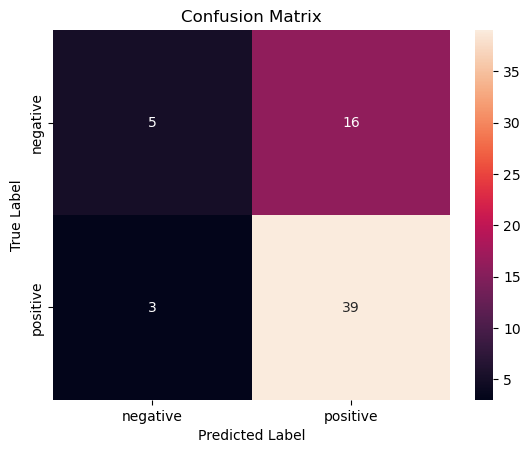

In [17]:
# Classification report
print(classification_report(y_test, log_reg_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, log_reg_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Classification Report
- From the table above we can see the precision for 0 variable is 0.62 and 1 variable is 0.71
- From the table above we can see the recall for 0 variable is 0.24 and 1 variable is 0.93
- From the table above we can  see the f1- score for 0 variable is 0.34 and 1 variable is 0.80
- From the table above we can see the accuracy for this model 0.70

### Confusion Matrix
There are 4 category in this matrix:
- True Positive, the number of true positive is 39
- True Negative, the number of true negative is 5
- False Negative, the number of false negative is 3
- False Positive, the number of false positive is 16

<HR>

## Building a Model with Cross Validation
Cross-Validation is a statistical method of evaluating and comparing learning algorithms by dividing data into two segments: one used to learn or train a model and the other used to validate the model.

In [18]:
model = [LogisticRegression()]
name = ["Logistic Regression"]
for model, name in zip(model, name):
    print(name)
    for score in ["accuracy", "precision", "recall", "f1"]:
        print(f" {score} - {cross_val_score(model, X_train_vect, y_train, scoring=score, cv=10).mean()} ")
    print()

Logistic Regression
 accuracy - 0.8028571428571428 
 precision - 0.7966483516483517 
 recall - 0.9800000000000001 
 f1 - 0.8772044187696363 



## Hyperparameter Tuning in Logistic Regression
Hyperparameter tuning consists of finding a set of optimal hyperparameter values for a learning algorithm while applying this optimized algorithm to any data set. That combination of hyperparameters maximizes the model's performance, minimizing a predefined loss function to produce better results with fewer errors.

In this part we get the params we need

In [19]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

And after that we list the value of each params

In [20]:
parameters = {"penalty": ['l1', 'l2', 'elasticnet', 'none'],
              "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              "n_jobs": [None, -1],
              "max_iter": [10, 100, 1000]
             }

After that we use gridsearchcv to get the best params

In [21]:
grid = GridSearchCV(estimator = model, param_grid = parameters, cv=3)

After we train the grid variable we get the best params

In [22]:
best_model = grid.fit(X_train_vect, y_train)

# find best param
best_model.best_params_

{'max_iter': 100, 'n_jobs': None, 'penalty': 'none', 'solver': 'lbfgs'}

## Building a Model with Hyperparameter Turning

After we get the params we build a new model using best params

In [23]:
# model with best param
model_new = LogisticRegression(max_iter=100, n_jobs=None, penalty='none', solver='lbfgs')

After that we train the model

In [24]:
train_model_new = model_new.fit(X_train_vect, y_train)

After that we test the new model

In [25]:
y_pred_new = model_new.predict(X_test_vect)

After that we make a report for the model

              precision    recall  f1-score   support

           0       0.80      0.76      0.78        21
           1       0.88      0.90      0.89        42

    accuracy                           0.86        63
   macro avg       0.84      0.83      0.84        63
weighted avg       0.86      0.86      0.86        63



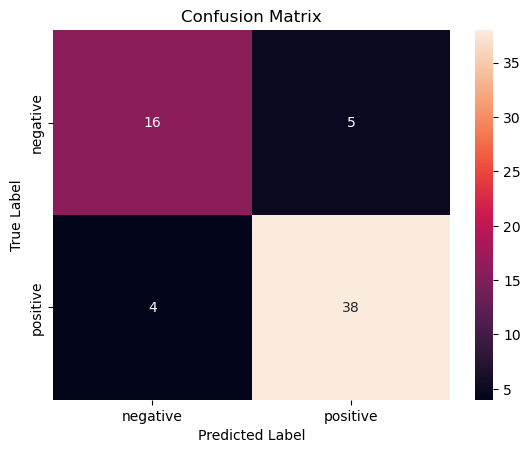

In [26]:
# Classification report
print(classification_report(y_test, y_pred_new))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred_new), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Classification Report
- From the table above we can see the precision for 0 variable is 0.80 and 1 variable is 0.88
- From the table above we can see the recall for 0 variable is 0.76 and 1 variable is 0.90
- From the table above we can  see the f1- score for 0 variable is 0.78 and 1 variable is 0.89
- From the table above we can see the accuracy for this model 0.86

### Confusion Matrix
There are 4 category in this matrix:
- True Positive, the number of true positive is 38
- True Negative, the number of true negative is 16
- False Negative, the number of false negative is 4
- False Positive, the number of false positive is 5

# Predictions

Now we train the model using tf-idf dataset, and see the score

In [27]:
classifier = LogisticRegression(max_iter=100, n_jobs=None, penalty='none', solver='lbfgs')

classifier.fit(tfidf_train, y_train)
classifier.score(tfidf_test, y_test)

0.8253968253968254

After that we make a list of sentence to test the model performace

In [28]:
data = ["Bad", "Good", "I hate the service, it's really bad", "The room is clean"]
vect = tfidf.transform(data).toarray()

my_pred = classifier.predict(vect)
print(my_pred)

[0 1 0 1]


<HR>

# Result

**How many hotel that has positive and negative review?**
- From the barchart we can see hotel with **label 1** have value **70%**. And with **label 0** has **30%**. From this chart we can give recommendation to increase the service of hotel with **Label 0**, because **30** is a high number.

**How many hotel based on their rating ?**
- From the result above we can see that hotel with **5 ratings** have the highest value with **47.14%** and hotel **4 ratings** are **22.86%**. And hotel with **1 rating** have higher value than **2 rating** with **10.95%**. from this chart we can give a recommendation to increase the service of **1 rating** hotel, so they can get more good review.

**How to produce modeling using Machine Learning to predict customer churn?**
* To produce modeling using machine learning can use Logistic Regression. Logistic Regression is a classification technique used in machine learning. It uses a logistic function to model the dependent variable. The dependent variable is dichotomous in nature, in this case is hotel who has positive or negative reviews. We are using deafult threshold in this model to classify the hotel.
* After using evaluation using this model we decided to use hyperparameter tunning to increase the model performance

# Recommendation

- based on rating we can give a recommendation to increase the service of **1 rating** hotel, so they can get more good review.
- based on label we can give recommendation to increase the service of hotel with **Label 0**, because **30%** is a high number.